## Web scraping and Extracting Data using REST API

    - how to extract required information from domains using web scraping in Python.
    - Using requests and BeautifulSoup libs to extract the contents of web pages.
    - Extract relevant data and save it in the specific format.
    
    plan is to extract top 50 movies from this site:
    https://web.archive.org/web/20230902185655/https://en.everybodywiki.com/100_Most_Highly-Ranked_Films
    
    Data I plan to extract is the Average Rank, name of movie and Year of release.
    will also save it to csv file and upload it to a DB
    

In [2]:
#libs
import requests
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup


- its better to documnet everything you know enitially in case you need to change something, so you wouldnt have to 
  look for the value in code too much
  

In [3]:
#connections

url = 'https://web.archive.org/web/20230902185655/https://en.everybodywiki.com/100_Most_Highly-Ranked_Films'
database = 'Movies.db'
table_name = 'Top_50'
data_path = 'WebScrapingExample/top_50_films.csv'
df = pd.DataFrame(columns=["rank","film","year"])
count = 0

    - first we need to load the entire web page as an HTML document in python using the requests.get().text function
      and then parse the text in the HTML format using BeautifulSoup to enable extraction of relevant information.
      then we can pull the data we need.

In [4]:
html_page = requests.get(url).text
data = BeautifulSoup(html_page, 'html.parser')

    - Scraping the data

* Allways inspect what you wish to crape from a page, look for the tag that covers the data you need in the HTML web code and write your script around it

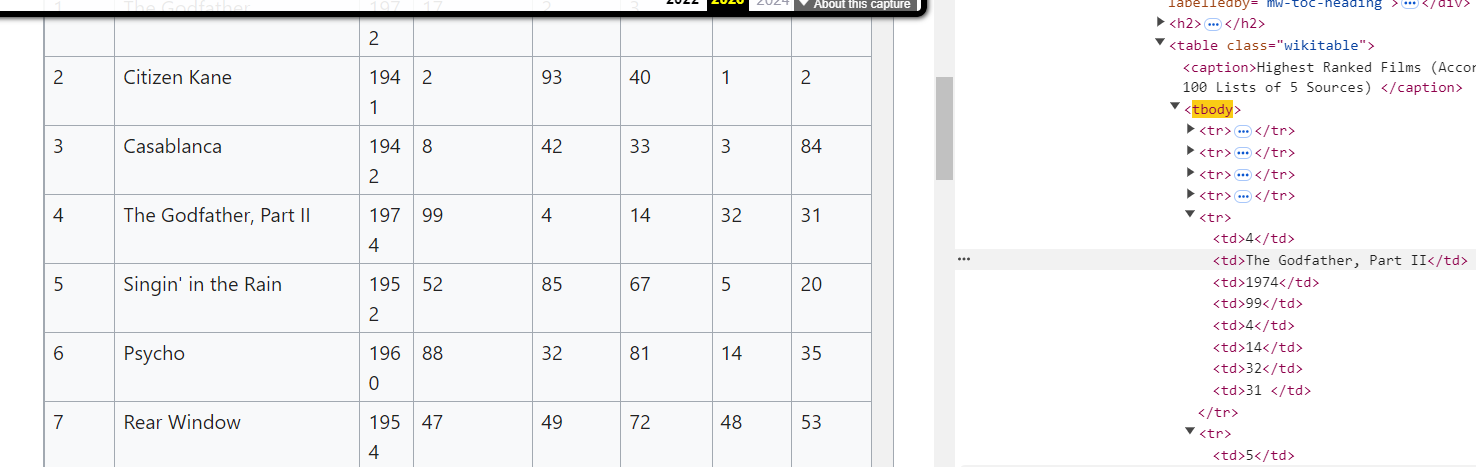

In [5]:
tables = data.find_all('tbody')
rows = tables[0].find_all('tr')

In [6]:
for row in rows:
    if count<50:
        col = row.find_all('td')
        
        if len(col)!=0:
            data_dict = {"rank": col[0].contents[0],"film": col[1].contents[0],"year": col[2].contents[0]}
            
            df1 = pd.DataFrame(data_dict, index=[0])
            df = pd.concat([df,df1], ignore_index=True)
            count+=1
    else:
        break

In [7]:
print(df)

   rank                                           film  year
0     1                                  The Godfather  1972
1     2                                   Citizen Kane  1941
2     3                                     Casablanca  1942
3     4                         The Godfather, Part II  1974
4     5                            Singin' in the Rain  1952
5     6                                         Psycho  1960
6     7                                    Rear Window  1954
7     8                                 Apocalypse Now  1979
8     9                          2001: A Space Odyssey  1968
9    10                                  Seven Samurai  1954
10   11                                        Vertigo  1958
11   12                                    Sunset Blvd  1950
12   13                                   Modern Times  1936
13   14                             Lawrence of Arabia  1962
14   15                             North by Northwest  1959
15   16                 

------------------------------------------------

    - extract data to oath folder in a form of csv file 

In [28]:
df.to_csv(data_path) #as we called it the connections cell

    - store data on a database,

1) first we need to connect to the database.

2) then we save the data we extracetd as a dataframe.

3) then close connection

In [31]:
connection = sqlite3.connect(database) #as we called it the connections cell

df.to_sql(table_name,connection,if_exists='replace',index=False)

connection.close()

-------------------------------------------